# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 599


---

# Requirement 1: Created Plots to Showcase the Relationship Between Weather Variables and Latitude

# Used the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Send the API request for the city
        weather_response = requests.get(city_url)
        weather_json = weather_response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = weather_json['coord']['lat']
        city_lng = weather_json['coord']['lon']
        city_max_temp = weather_json['main']['temp_max']
        city_humidity = weather_json['main']['humidity']
        city_clouds = weather_json['clouds']['all']
        city_wind = weather_json['wind']['speed']
        city_country = weather_json['sys']['country']
        city_date = weather_json['dt']

        # Append the City information into city_data list
        city_data.append({
            "City": city,
            "Lat": city_lat,
            "Lng": city_lng,
            "Max Temp": city_max_temp,
            "Humidity": city_humidity,
            "Cloudiness": city_clouds,
            "Wind Speed": city_wind,
            "Country": city_country,
            "Date": city_date
        })

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto natales
Processing Record 2 of Set 1 | bredasdorp
Processing Record 3 of Set 1 | adamstown
Processing Record 4 of Set 1 | petropavlovsk-kamchatsky
Processing Record 5 of Set 1 | buulobarde
Processing Record 6 of Set 1 | kerikeri
Processing Record 7 of Set 1 | constantia
Processing Record 8 of Set 1 | aljezur
Processing Record 9 of Set 1 | taro
Processing Record 10 of Set 1 | fot
Processing Record 11 of Set 1 | isla vista
Processing Record 12 of Set 1 | bobo-dioulasso
Processing Record 13 of Set 1 | port-aux-francais
Processing Record 14 of Set 1 | margaret river
Processing Record 15 of Set 1 | vilyuchinsk
Processing Record 16 of Set 1 | puerto baquerizo moreno
Processing Record 17 of Set 1 | puerto ayora
Processing Record 18 of Set 1 | albany
Processing Record 19 of Set 1 | blackmans bay
Processing Record 20 of Set 1 | shetpe
Processing Record 21 of Set 1 | colombo
Processing Record 22 of 

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          574
Lat           574
Lng           574
Max Temp      574
Humidity      574
Cloudiness    574
Wind Speed    574
Country       574
Date          574
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto natales,-51.7236,-72.4875,4.26,92,100,10.13,CL,1691059633
1,bredasdorp,-34.5322,20.0403,22.53,41,43,2.76,ZA,1691059643
2,adamstown,-25.0660,-130.1015,21.52,79,97,9.58,PN,1691059645
3,petropavlovsk-kamchatsky,53.0452,158.6483,12.33,100,20,3.00,RU,1691059646
4,buulobarde,3.8538,45.5674,33.17,36,96,10.81,SO,1691059647


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,4.26,92,100,10.13,CL,1691059633
1,bredasdorp,-34.5322,20.0403,22.53,41,43,2.76,ZA,1691059643
2,adamstown,-25.0660,-130.1015,21.52,79,97,9.58,PN,1691059645
3,petropavlovsk-kamchatsky,53.0452,158.6483,12.33,100,20,3.00,RU,1691059646
4,buulobarde,3.8538,45.5674,33.17,36,96,10.81,SO,1691059647


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

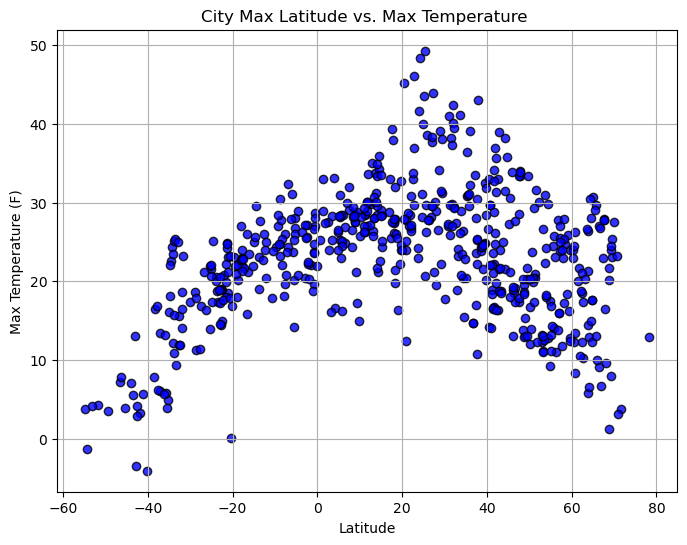

In [11]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(8, 6))
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], color='b', edgecolor='black', alpha=0.8)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Max Latitude vs. Max Temperature ')
plt.grid(True)

# Save the figure
plt.savefig("Fig1.png")

 # Show plot
plt.show()

#### Latitude Vs. Humidity

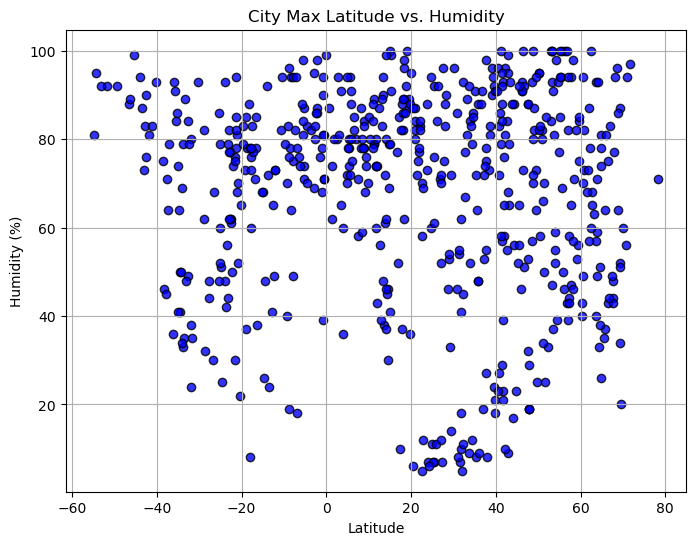

In [12]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(8, 6))
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], color='b', edgecolor='black', alpha=0.8)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Max Latitude vs. Humidity')
plt.grid(True)

# Save the figure
plt.savefig("Fig2.png")

 # Show plot
plt.show()

#### Latitude Vs. Cloudiness

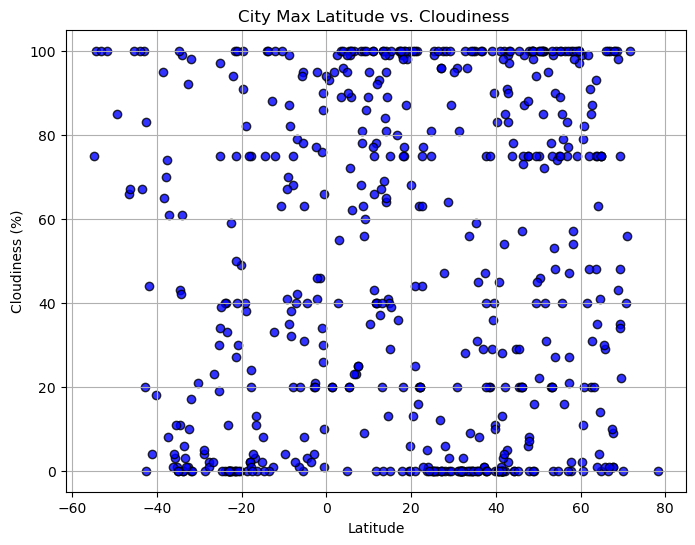

In [13]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(8, 6))
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], color='b', edgecolor='black', alpha=0.8)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Max Latitude vs. Cloudiness ')
plt.grid(True)

# Save the figure
plt.savefig("Fig3.png")

 # Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

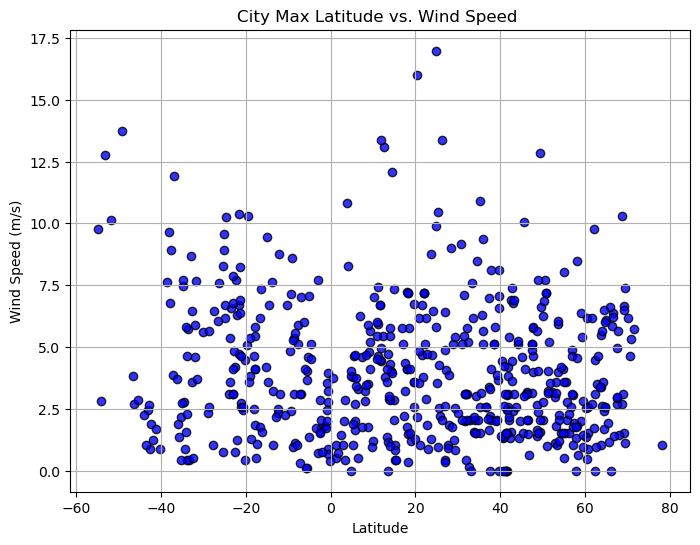

In [14]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(8, 6))
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], color='b', edgecolor='black', alpha=0.8)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Max Latitude vs. Wind Speed ')
plt.grid(True)

# Save the figure
plt.savefig("Fig4.png")

 # Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [16]:

# Filter data for the Northern Hemisphere (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0].reset_index(drop=True)

# Display the resulting DataFrame
northern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,petropavlovsk-kamchatsky,53.0452,158.6483,12.33,100,20,3.00,RU,1691059646
1,buulobarde,3.8538,45.5674,33.17,36,96,10.81,SO,1691059647
2,constantia,44.1833,28.6500,31.50,56,0,5.12,RO,1691059649
3,aljezur,37.3191,-8.8033,23.55,53,1,6.97,PT,1691059650
4,fot,47.6177,19.1887,28.52,53,6,3.13,HU,1691059652


In [17]:

#Filtern data for Southern Hemisphere (Latitude < 0)

southern_hemi_df = city_data_df[city_data_df['Lat'] < 0].reset_index(drop=True)

#Display
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto natales,-51.7236,-72.4875,4.26,92,100,10.13,CL,1691059633
1,bredasdorp,-34.5322,20.0403,22.53,41,43,2.76,ZA,1691059643
2,adamstown,-25.0660,-130.1015,21.52,79,97,9.58,PN,1691059645
3,kerikeri,-35.2268,173.9474,4.95,86,1,2.16,NZ,1691059648
4,taro,-8.3862,115.2800,22.00,94,38,1.12,ID,1691059651


###  Temperature vs. Latitude Linear Regression Plot

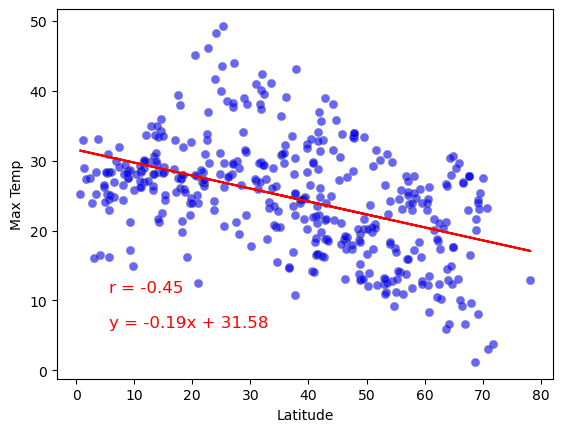

In [20]:
# Define the temperature and latitude data
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Max Temp"]

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Create a function for the regression line
def regression_line(x):
    return slope * x + intercept

# Create the scatter plot
plt.scatter(x, y, color='blue', alpha=0.6, edgecolors='grey', linewidth=0.5)

# Plot the regression line
plt.plot(x, regression_line(x), color='red', label='Regression Line')

# Set labels and title
plt.xlabel('Latitude')
plt.ylabel('Max Temp')


# Show the equation of the regression line as a text on the plot
equation_text = f'y = {slope:.2f}x + {intercept:.2f}'
plt.text(x.min() + 5, y.min() + 5, equation_text, fontsize=12, color='red')

# Show the correlation coefficient (r-value) as a text on the plot
r_value_text = f'r = {r_value:.2f}'
plt.text(x.min() + 5, y.min() + 10, r_value_text, fontsize=12, color='red')

# Show the plot
plt.show()

**Discussion about the linear relationship:** The correlation coefficient (r-value) will give you an indication of the strength of the linear relationship between temperature and latitude; an r-value close to 1 or -1 implies a strong linear correlation.

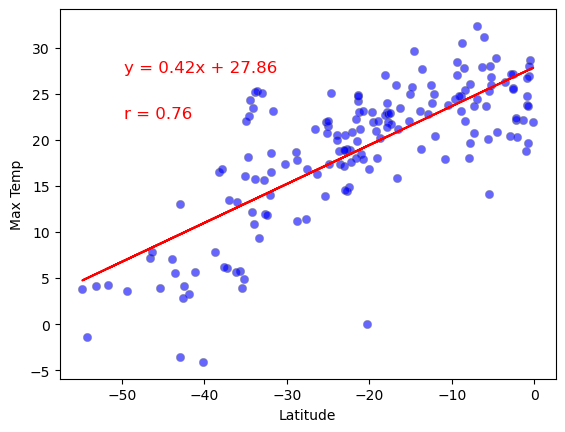

In [21]:
#Define the temperature and latitude data
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Max Temp"]

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Create a function for the regression line
def regression_line(x):
    return slope * x + intercept

# Create the scatter plot
plt.scatter(x, y, color='blue', alpha=0.6, edgecolors='grey', linewidth=0.5)

# Plot the regression line
plt.plot(x, regression_line(x), color='red', label='Regression Line')

# Set labels and title
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

# Show the equation of the regression line as a text on the plot
equation_text = f'y = {slope:.2f}x + {intercept:.2f}'
plt.text(x.min() + 5, y.max() - 5, equation_text, fontsize=12, color='red')

# Show the correlation coefficient (r-value) as a text on the plot
r_value_text = f'r = {r_value:.2f}'
plt.text(x.min() + 5, y.max() - 10, r_value_text, fontsize=12, color='red')

# Show the plot
plt.show()


**Discussion about the linear relationship:** The correlation coefficient (r-value) will give you an indication of the strength of the linear relationship between temperature and latitude; an r-value close to 1 or -1 implies a strong linear correlation.

### Humidity vs. Latitude Linear Regression Plot

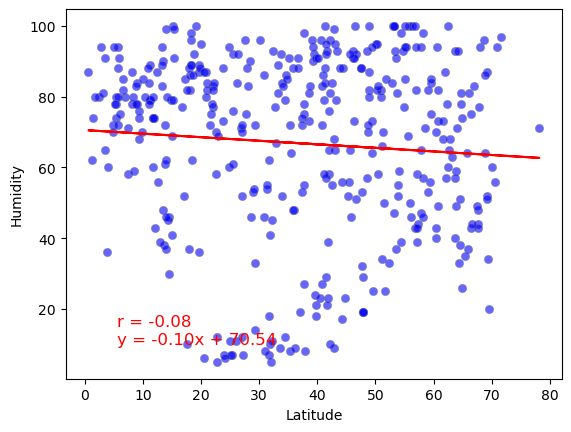

In [22]:
# Define the temperature and latitude data
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Humidity"]

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Create a function for the regression line
def regression_line(x):
    return slope * x + intercept

# Create the scatter plot
plt.scatter(x, y, color='blue', alpha=0.6, edgecolors='grey', linewidth=0.5)

# Plot the regression line
plt.plot(x, regression_line(x), color='red', label='Regression Line')

# Set labels and title
plt.xlabel('Latitude')
plt.ylabel('Humidity')


# Show the equation of the regression line as a text on the plot
equation_text = f'y = {slope:.2f}x + {intercept:.2f}'
plt.text(x.min() + 5, y.min() + 5, equation_text, fontsize=12, color='red')

# Show the correlation coefficient (r-value) as a text on the plot
r_value_text = f'r = {r_value:.2f}'
plt.text(x.min() + 5, y.min() + 10, r_value_text, fontsize=12, color='red')

# Show the plot
plt.show()

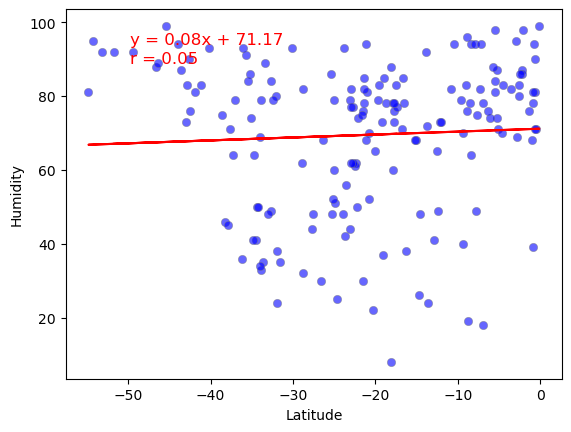

In [23]:
#Define the temperature and latitude data
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Humidity"]

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Create a function for the regression line
def regression_line(x):
    return slope * x + intercept

# Create the scatter plot
plt.scatter(x, y, color='blue', alpha=0.6, edgecolors='grey', linewidth=0.5)

# Plot the regression line
plt.plot(x, regression_line(x), color='red', label='Regression Line')

# Set labels and title
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Show the equation of the regression line as a text on the plot
equation_text = f'y = {slope:.2f}x + {intercept:.2f}'
plt.text(x.min() + 5, y.max() - 5, equation_text, fontsize=12, color='red')

# Show the correlation coefficient (r-value) as a text on the plot
r_value_text = f'r = {r_value:.2f}'
plt.text(x.min() + 5, y.max() - 10, r_value_text, fontsize=12, color='red')

# Show the plot
plt.show()


### Cloudiness vs. Latitude Linear Regression Plot

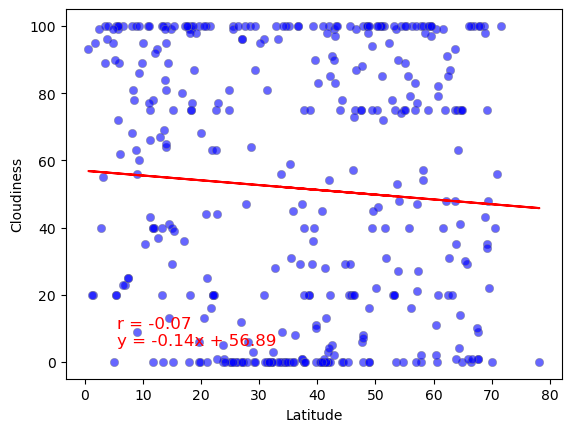

In [26]:
# Define the temperature and latitude data
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Cloudiness"]

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Create a function for the regression line
def regression_line(x):
    return slope * x + intercept

# Create the scatter plot
plt.scatter(x, y, color='blue', alpha=0.6, edgecolors='grey', linewidth=0.5)

# Plot the regression line
plt.plot(x, regression_line(x), color='red', label='Regression Line')

# Set labels and title
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')


# Show the equation of the regression line as a text on the plot
equation_text = f'y = {slope:.2f}x + {intercept:.2f}'
plt.text(x.min() + 5, y.min() + 5, equation_text, fontsize=12, color='red')

# Show the correlation coefficient (r-value) as a text on the plot
r_value_text = f'r = {r_value:.2f}'
plt.text(x.min() + 5, y.min() + 10, r_value_text, fontsize=12, color='red')

# Show the plot
plt.show()


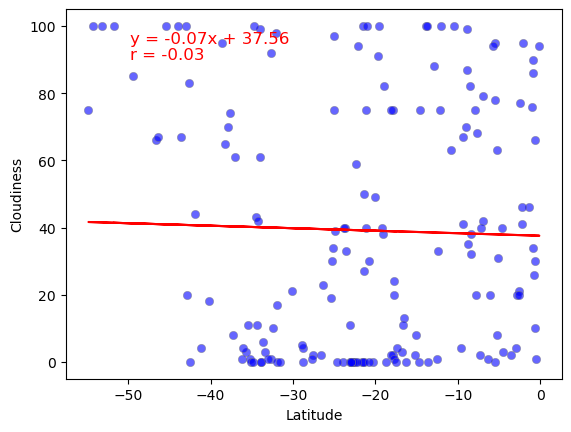

In [24]:
#Define the temperature and latitude data
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Cloudiness"]

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Create a function for the regression line
def regression_line(x):
    return slope * x + intercept

# Create the scatter plot
plt.scatter(x, y, color='blue', alpha=0.6, edgecolors='grey', linewidth=0.5)

# Plot the regression line
plt.plot(x, regression_line(x), color='red', label='Regression Line')

# Set labels and title
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Show the equation of the regression line as a text on the plot
equation_text = f'y = {slope:.2f}x + {intercept:.2f}'
plt.text(x.min() + 5, y.max() - 5, equation_text, fontsize=12, color='red')

# Show the correlation coefficient (r-value) as a text on the plot
r_value_text = f'r = {r_value:.2f}'
plt.text(x.min() + 5, y.max() - 10, r_value_text, fontsize=12, color='red')

# Show the plot
plt.show()


### Wind Speed vs. Latitude Linear Regression Plot

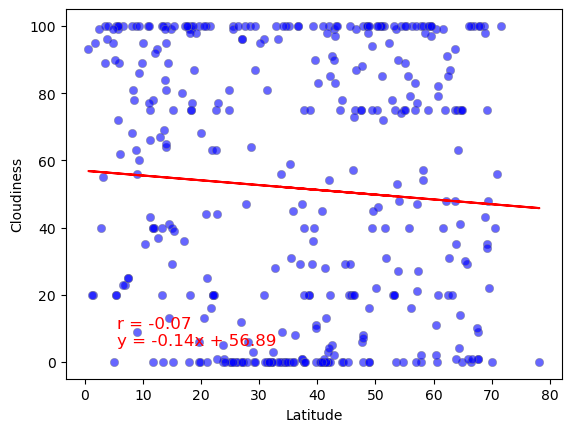

In [27]:
# Define the temperature and latitude data
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Cloudiness"]

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Create a function for the regression line
def regression_line(x):
    return slope * x + intercept

# Create the scatter plot
plt.scatter(x, y, color='blue', alpha=0.6, edgecolors='grey', linewidth=0.5)

# Plot the regression line
plt.plot(x, regression_line(x), color='red', label='Regression Line')

# Set labels and title
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')


# Show the equation of the regression line as a text on the plot
equation_text = f'y = {slope:.2f}x + {intercept:.2f}'
plt.text(x.min() + 5, y.min() + 5, equation_text, fontsize=12, color='red')

# Show the correlation coefficient (r-value) as a text on the plot
r_value_text = f'r = {r_value:.2f}'
plt.text(x.min() + 5, y.min() + 10, r_value_text, fontsize=12, color='red')

# Show the plot
plt.show()

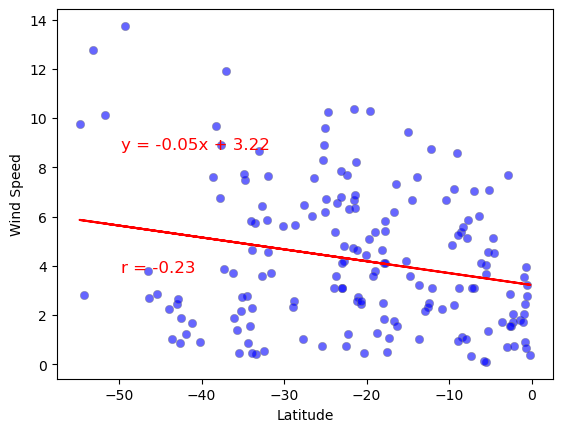

In [25]:
#Define the temperature and latitude data
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Wind Speed"]

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Create a function for the regression line
def regression_line(x):
    return slope * x + intercept

# Create the scatter plot
plt.scatter(x, y, color='blue', alpha=0.6, edgecolors='grey', linewidth=0.5)

# Plot the regression line
plt.plot(x, regression_line(x), color='red', label='Regression Line')

# Set labels and title
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

# Show the equation of the regression line as a text on the plot
equation_text = f'y = {slope:.2f}x + {intercept:.2f}'
plt.text(x.min() + 5, y.max() - 5, equation_text, fontsize=12, color='red')

# Show the correlation coefficient (r-value) as a text on the plot
r_value_text = f'r = {r_value:.2f}'
plt.text(x.min() + 5, y.max() - 10, r_value_text, fontsize=12, color='red')

# Show the plot
plt.show()
